In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/ML/Projeto Final/

depre = pd.read_csv('Depression Student Dataset.csv')
depre

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/ML/Projeto Final


,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No


In [60]:
print(depre.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [61]:
depre.isnull().sum() # Dados faltantes

,0
Gender,0
Age,0
Academic Pressure,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Study Hours,0
Financial Stress,0
Family History of Mental Illness,0


In [63]:
# Acessa linhas do dataframe de linhas diferentes e inputar dados faltantes

depre.loc[0, 'Gender'] = np.nan
depre.loc[1, 'Sleep Duration'] = np.nan
depre.loc[2, 'Dietary Habits'] = np.nan
depre.loc[3, 'Have you ever had suicidal thoughts ?'] = np.nan
depre.loc[4, 'Family History of Mental Illness'] = np.nan

In [64]:
depre.isnull().sum() # Dados faltantes

,0
Gender,1
Age,0
Academic Pressure,0
Study Satisfaction,0
Sleep Duration,1
Dietary Habits,1
Have you ever had suicidal thoughts ?,1
Study Hours,0
Financial Stress,0
Family History of Mental Illness,1


In [65]:
depre.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,NaN,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,NaN,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,NaN,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,NaN,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,NaN,No


In [66]:
# Imputação da mediana para colunas numéricas
num_cols = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']
for col in num_cols:
    depre[col].fillna(depre[col].median(), inplace=True)

# Imputação da moda para colunas categóricas
cat_cols = ['Gender', 'Sleep Duration', 'Dietary Habits',
            'Have you ever had suicidal thoughts ?',
            'Family History of Mental Illness', 'Depression']
for col in cat_cols:
    depre[col].fillna(depre[col].mode()[0], inplace=True)


<ipython-input-66-11449a77cff3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  depre[col].fillna(depre[col].median(), inplace=True)
<ipython-input-66-11449a77cff3>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [67]:
depre.isnull().sum() # Dados faltantes

,0
Gender,0
Age,0
Academic Pressure,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Study Hours,0
Financial Stress,0
Family History of Mental Illness,0


In [69]:
# Checagem posterior para verificar se há dados faltantes ainda após inputação de dados
print(depre.isnull().sum())

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


<Axes: title={'center': 'Depressão'}, ylabel='count'>

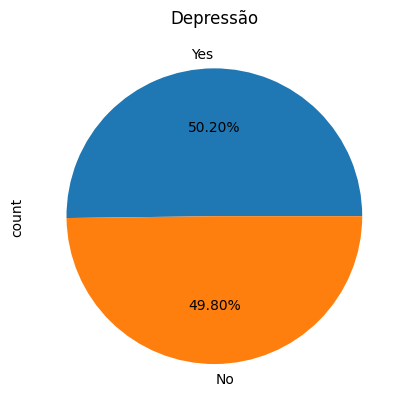

In [70]:
depre["Depression"].value_counts().plot(kind='pie', autopct='%.2f%%', title='Depressão')

In [71]:
numericas = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours']
categoricas = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Financial Stress']

Gender
Male      267
Female    235
Name: count, dtype: int64


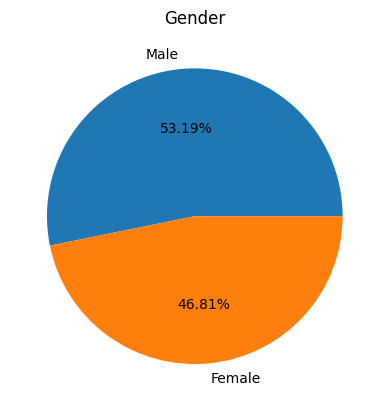


Sleep Duration
7-8 hours            129
More than 8 hours    128
Less than 5 hours    123
5-6 hours            122
Name: count, dtype: int64


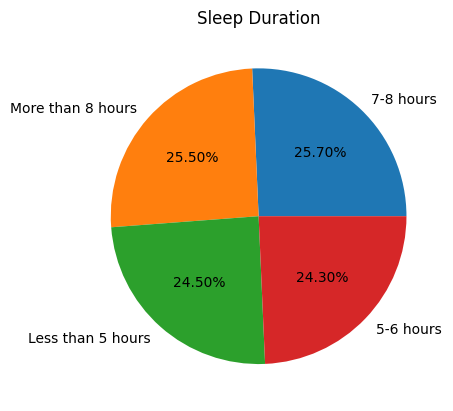


Dietary Habits
Moderate     173
Unhealthy    168
Healthy      161
Name: count, dtype: int64


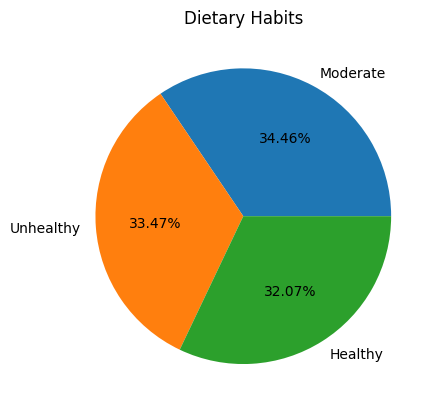


Have you ever had suicidal thoughts ?
Yes    260
No     242
Name: count, dtype: int64


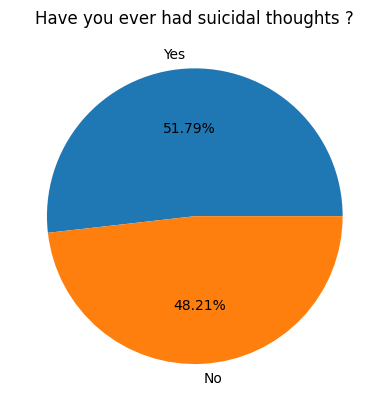


Family History of Mental Illness
No     266
Yes    236
Name: count, dtype: int64


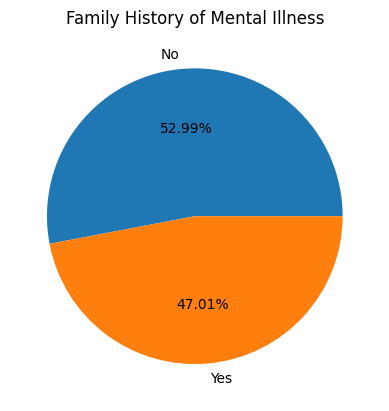


Financial Stress
1    110
2    102
3    100
5     96
4     94
Name: count, dtype: int64


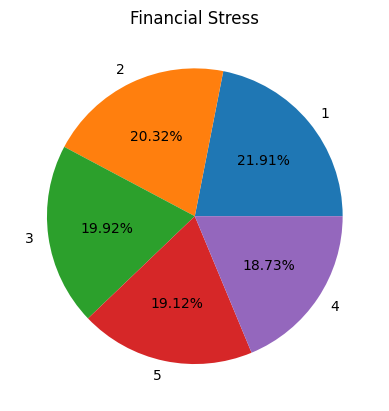

In [72]:
# Verificação categóricas
for coluna in categoricas:
  print(depre[coluna].value_counts())
  plt.figure()
  depre[coluna].value_counts().plot(kind='pie', autopct='%.2f%%', title=coluna)
  plt.ylabel('')
  plt.show()
  print()

In [73]:
# Verificação numéricas
print('Média')
for coluna in numericas:
  print(coluna + ':', depre[coluna].mean())

# Mediana
print('\nMediana')
for coluna in numericas:
  print(coluna + ':', depre[coluna].median())

# Moda
print('\nModa')
for coluna in numericas:
  print(coluna + ':', depre[coluna].mode())

# Variância
print('\nVariância')
for coluna in numericas:
  print(coluna + ':', depre[coluna].var())

# Desvio padrão
print('\nDesvio padrão')
for coluna in numericas:
  print(coluna + ':', depre[coluna].std())

# Quartis
print('\nQuartis')
for coluna in numericas:
  quartil = depre[coluna].quantile([0.25, 0.5, 0.75])
  print(quartil)
  q1 = quartil[0.25]
  q2 = quartil[0.5]
  q3 = quartil[0.75]
  print('Intervalo Interquartil:', q3 - q1)
  print('\n')

Média
Age: 26.241035856573706
Academic Pressure: 3.00398406374502
Study Satisfaction: 3.0756972111553784
Study Hours: 6.404382470119522

Mediana
Age: 26.5
Academic Pressure: 3.0
Study Satisfaction: 3.0
Study Hours: 7.0

Moda
Age: 0    28
Name: Age, dtype: int64
Academic Pressure: 0    3.0
Name: Academic Pressure, dtype: float64
Study Satisfaction: 0    4.0
Name: Study Satisfaction, dtype: float64
Study Hours: 0    10
Name: Study Hours, dtype: int64

Variância
Age: 23.97571788693526
Academic Pressure: 1.932119824096826
Study Satisfaction: 1.886474063824541
Study Hours: 14.005809098933625

Desvio padrão
Age: 4.896500575608591
Academic Pressure: 1.3900071309517898
Study Satisfaction: 1.3734897392498209
Study Hours: 3.742433579762455

Quartis
0.25    22.0
0.50    26.5
0.75    30.0
Name: Age, dtype: float64
Intervalo Interquartil: 8.0


0.25    2.0
0.50    3.0
0.75    4.0
Name: Academic Pressure, dtype: float64
Intervalo Interquartil: 2.0


0.25    2.0
0.50    3.0
0.75    4.0
Name: Study Sa

In [76]:
# Label-encoding nas features com Yes/No
depre['Depression'] = depre['Depression'].replace('No',0)
depre['Depression'] = depre['Depression'].replace('Yes',1)
depre['Have you ever had suicidal thoughts ?'] = depre['Have you ever had suicidal thoughts ?'].replace('No',0)
depre['Have you ever had suicidal thoughts ?'] = depre['Have you ever had suicidal thoughts ?'].replace('Yes',1)
depre['Family History of Mental Illness'] = depre['Family History of Mental Illness'].replace('No',0)
depre['Family History of Mental Illness'] = depre['Family History of Mental Illness'].replace('Yes',1)
depre.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,1,9,2,1,0
1,Male,28,4.0,5.0,7-8 hours,Healthy,1,7,1,1,0
2,Male,25,1.0,3.0,5-6 hours,Moderate,1,10,4,0,1
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,1,7,2,1,0
4,Female,31,1.0,5.0,More than 8 hours,Healthy,1,4,2,0,0


In [78]:
X = depre.drop('Depression', axis=1)
X = X.values
y = depre['Depression']